# Dispa-SET example run notebook

Simple Dispa-SET simulation in Jupyter

### Load DispaSET and the required libraries:

In [1]:
%matplotlib inline
import sys,os
sys.path.append(os.path.abspath('..'))

import dispaset as ds
import pandas as pd
import numpy as np

### Load the configuration file

This step can be skipped if the simulation has already been run

In [2]:
config = ds.load_config_excel('../ConfigFiles/ConfigTest.xlsx')


[INFO    ] (load_config_excel): Using config file ../ConfigFiles/ConfigTest.xlsx to build the simulation environment
[INFO    ] (load_config_excel): Using /home/sylvain/svn/Dispa-SET_Public/Simulations/simulation_test as simulation folder


### Build the simulation environment:

This step can be skipped if the simulation has already been run

In [3]:
SimData = ds.build_simulation(config)

[INFO    ] (build_simulation): New build started. DispaSET version: b'v2.2-137-g580295b'
[INFO    ] (build_simulation): Scaling load curve by a factor 0.17
[INFO    ] (NodeBasedTable): No data file found for the table LoadShedding. Using default value 0.05
[INFO    ] (NodeBasedTable): No data file found for the table CostLoadShedding. Using default value 400.0
[WARNING ] (UnitBasedTable): No specific information was found for unit Maasvlakte in table Outages. The generic information for STUR has been used
[INFO    ] (UnitBasedTable): No specific information was found for unit Diemen in table Outages. Using default value None
[INFO    ] (UnitBasedTable): No specific information was found for unit Rijnmond II in table Outages. Using default value None
[WARNING ] (UnitBasedTable): No specific information was found for unit Borssele 12 in table Outages. The generic information for STUR has been used
[INFO    ] (UnitBasedTable): No specific information was found for unit PHOT_Z2 in table Ou

[WARNING ] (build_simulation): Outages factors not found for unit [13] - INESCO WKK. Assuming no outages
[WARNING ] (build_simulation): Outages factors not found for unit [14] - PHOT_Z1. Assuming no outages
[WARNING ] (build_simulation): Outages factors not found for unit [15] - WindOn_Z1. Assuming no outages
[WARNING ] (get_gams_path): The provided path for GAMS ( ) does not exist. Trying to locate...
[INFO    ] (get_gams_path): Detected /home/sylvain/progs/GAMS/gams24.4_linux_x64_64_sfx/ as GAMS path on this computer
[INFO    ] (write_variables): Data Successfully written to Inputs.gdx
[INFO    ] (build_simulation): Build finished


### Solve using GAMS:

This step can be time-consumping. It can be skipped if the simulation has already been run

In [4]:
_ = ds.solve_GAMS(config['SimulationDirectory'], config['GAMS_folder'])

[WARNING ] (solve_GAMS): Could not import gams. Trying to use lower level APIs
[WARNING ] (get_gams_path): The provided path for GAMS ( ) does not exist. Trying to locate...
[INFO    ] (get_gams_path): Detected /home/sylvain/progs/GAMS/gams24.4_linux_x64_64_sfx/ as GAMS path on this computer
[INFO    ] (solve_low_level): Completed simulation in 17.50 seconds


### Load the simulation results:

If the simulation has been run elsewhere, change config['SimulationDirectory'] by the absolute or relative path to the simulation directory

In [5]:
inputs,results = ds.get_sim_results(config['SimulationDirectory'],cache=False)

[WARNING ] (get_gams_path): The provided path for GAMS ( ) does not exist. Trying to locate...
[INFO    ] (get_gams_path): Detected /home/sylvain/progs/GAMS/gams24.4_linux_x64_64_sfx/ as GAMS path on this computer
[INFO    ] (gdx_to_list): Loading gdx file /home/sylvain/svn/Dispa-SET_Public/Simulations/simulation_test/Results.gdx took 0.05025529861450195s
[INFO    ] (gdx_to_dataframe): Time to convert to dataframes: 0.03395819664001465s


### Generate country-specific plots

Randomly selected zone for the detailed analysis: Z1


True

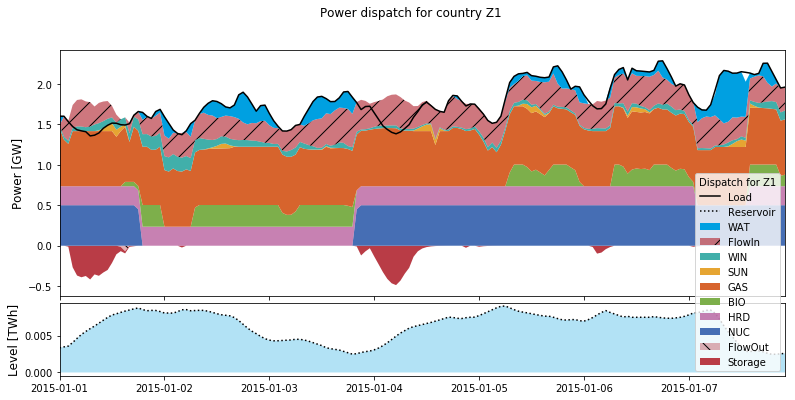

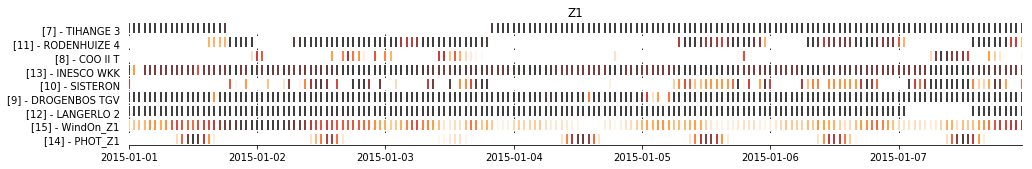

In [6]:
ds.plot_country(inputs,results)

### Bar plot with the installed capacities in all countries:

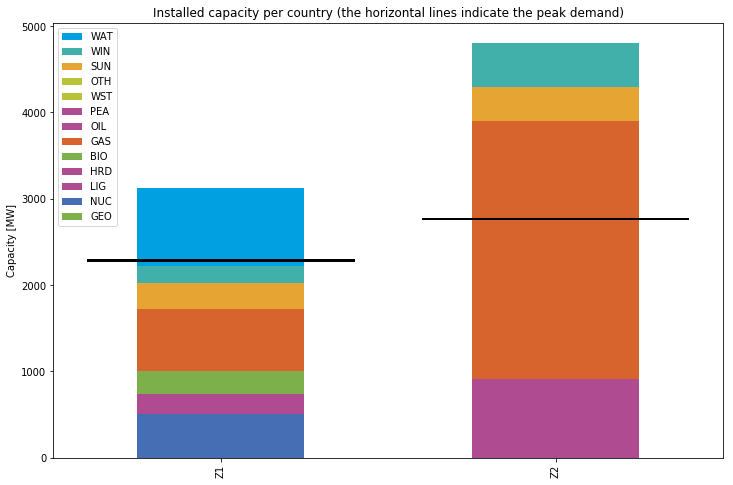

In [7]:
cap = ds.plot_country_capacities(inputs)

### Bar plot with the energy balances in all countries:

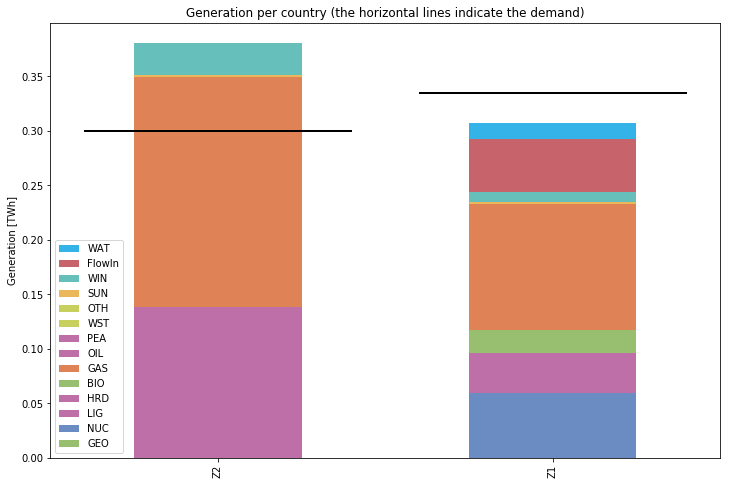

In [8]:
ds.plot_energy_country_fuel(inputs,results,ds.get_indicators_powerplant(inputs,results))

### Analyse the results for each country and provide quantitative indicators:

In [9]:
r = ds.get_result_analysis(inputs,results)


Average electricity cost : 37.04931514460061 EUR/MWh

Aggregated statistics for the considered area:
Total consumption:0.6348256705000003 TWh
Peak load:5052.570000000001 MW
Net importations:0.0032018000000000003 TWh

Country-Specific values (in TWh or in MW):
      Demand  PeakLoad  NetImports  LoadShedding  Curtailment
Z1  0.299808  2284.035    0.048431      0.000218          NaN
Z2  0.335018  2768.535   -0.045230           NaN          NaN

Number of hours of congestion on each line: 
{'Z1 -> Z2': 0, 'Z2 -> Z1': 144}

Country-Specific storage data
    Storage Capacity [MWh]  Storage Power [MW]  Peak load shifting [hours]  \
Z1                  7599.0               904.0                    3.327007   
Z2                     0.0                 0.0                    0.000000   

    Average daily cycle depth [%]  
Z1                       0.277279  
Z2                       0.000000  


### Plot the reservoir levels

True

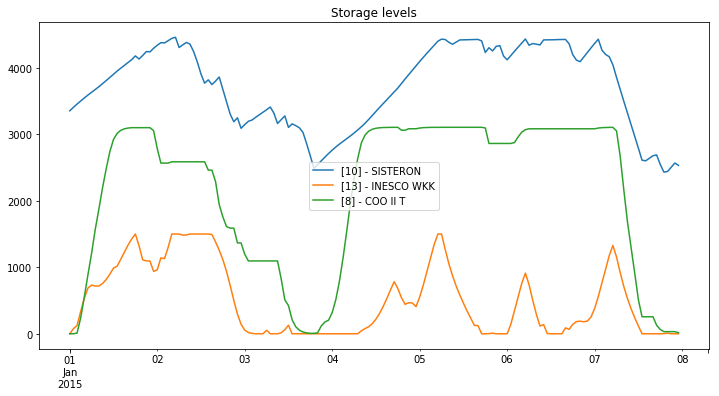

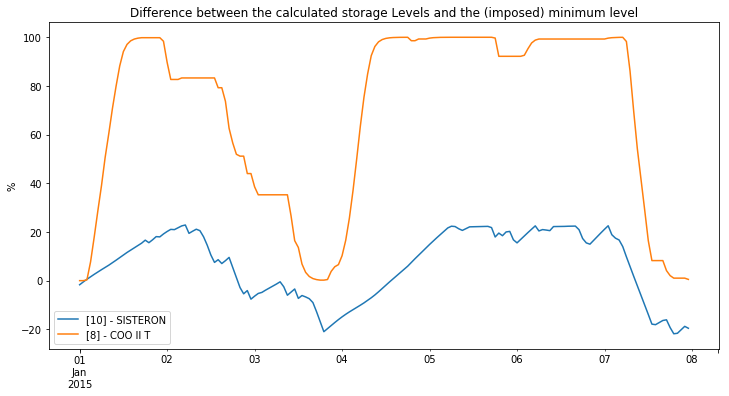

In [10]:
ds.storage_levels(inputs,results)

### Plot the shadow price

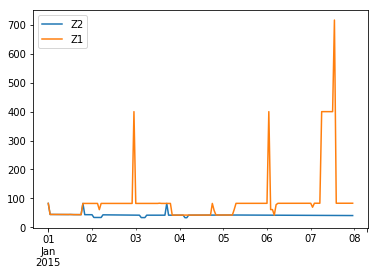

In [11]:
results['ShadowPrice'].plot()

### Reading the input dataframes

Example: show the total installed capacity by fuel:

In [16]:
inputs['units'].groupby(['Fuel']).sum()

,Efficiency,TimeDownMinimum,RampUpRate,RampDownRate,CostStartUp,PartLoadMin,MinEfficiency,EmissionRate,CHPPowerToHeat,CHPPowerLossFactor,StorageCapacity,StorageSelfDischarge,StorageChargingCapacity,StorageChargingEfficiency,CHPMaxHeat
Fuel,,,,,,,,,,,,,,,
BIO,0.4500,6.0,0.018657,0.018657,2000.00,0.200000,0.4500,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0
GAS,2.0618,3.0,0.093784,0.093784,355126.36,1.431125,2.0543,1.35,1.0,0.18,1500.0,0.03,0.0,0.00,0.0
HRD,1.1850,18.0,0.038204,0.038204,351726.51,0.900000,1.1850,2.85,0.0,0.00,0.0,0.00,0.0,0.00,0.0
NUC,0.4050,48.0,0.003279,0.003279,200000.00,0.900000,0.4050,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0
SUN,2.0000,0.0,0.934586,0.934586,0.00,0.000000,2.0000,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0
WAT,1.7100,0.0,0.855343,0.855343,0.00,0.000000,1.7100,0.00,0.0,0.00,7599.0,0.00,690.0,1.72,0.0
WIN,3.0000,0.0,0.714714,0.714714,0.00,0.000000,3.0000,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0


Example: show all power generation units:

In [14]:
inputs['units']

,Unit,PowerCapacity,Nunits,Zone,Technology,Fuel,Efficiency,TimeUpMinimum,TimeDownMinimum,RampUpRate,...,StartUpTime,EmissionRate,CHPType,CHPPowerToHeat,CHPPowerLossFactor,StorageCapacity,StorageSelfDischarge,StorageChargingCapacity,StorageChargingEfficiency,CHPMaxHeat
[0] - Maasvlakte,[0] - Maasvlakte,500,1,Z2,STUR,HRD,0.3950,8,6.0,0.004673,...,7,0.95,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[1] - Diemen,[1] - Diemen,430,1,Z2,COMC,GAS,0.5250,5,1.0,0.016330,...,1,0.45,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[2] - Rijnmond II,[2] - Rijnmond II,427,6,Z2,COMC,GAS,0.5250,5,1.0,0.026159,...,1,0.45,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[3] - Borssele 12,[3] - Borssele 12,408,1,Z2,STUR,HRD,0.3950,8,6.0,0.012255,...,7,0.95,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[4] - PHOT_Z2,[4] - PHOT_Z2,400,1,Z2,PHOT,SUN,1.0000,0,0.0,0.629811,...,0,0.00,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[5] - WindOff_Z2,[5] - WindOff_Z2,200,1,Z2,WTOF,WIN,1.0000,0,0.0,0.562249,...,0,0.00,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[6] - WindOn_Z2,[6] - WindOn_Z2,300,1,Z2,WTON,WIN,1.0000,0,0.0,0.044379,...,0,0.00,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[7] - TIHANGE 3,[7] - TIHANGE 3,500,1,Z1,STUR,NUC,0.4050,48,48.0,0.003279,...,0,0.00,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[8] - COO II T,[8] - COO II T,690,1,Z1,HPHS,WAT,0.8600,0,0.0,0.434783,...,0,0.00,,NaN,NaN,3105.0,0.00,690.0,0.86,NaN
[9] - DROGENBOS TGV,[9] - DROGENBOS TGV,465,1,Z1,COMC,GAS,0.5250,5,1.0,0.024022,...,0,0.45,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
